## Module 3 Example

The Boston Housing Case



In [0]:
############################Initialization############################
RANDOM_SEED = 1 # seed value for random number generator             
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
from matplotlib import rc
import os #manage files
import matplotlib.pyplot as plt  #plots
from matplotlib import rc
import sklearn 
from sklearn.model_selection import train_test_split
import itertools
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score # evaluation metrics
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
#from sklearn.ensemble import RandomForestRegressor # Random Forest package
#from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
#from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package
from sklearn.model_selection import KFold
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # modeling package
#os.chdir('C:\\Users\\BastiaND')
#####################################################################

## Read the Data, Drop Neighborhood, Run Descriptives / Graphs

Load and clean.


In [2]:
mydata=pd.read_csv('boston.csv')
mydata.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
mydata=mydata.drop('neighborhood', 1)
mydata.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
mydata.describe(include="all")

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


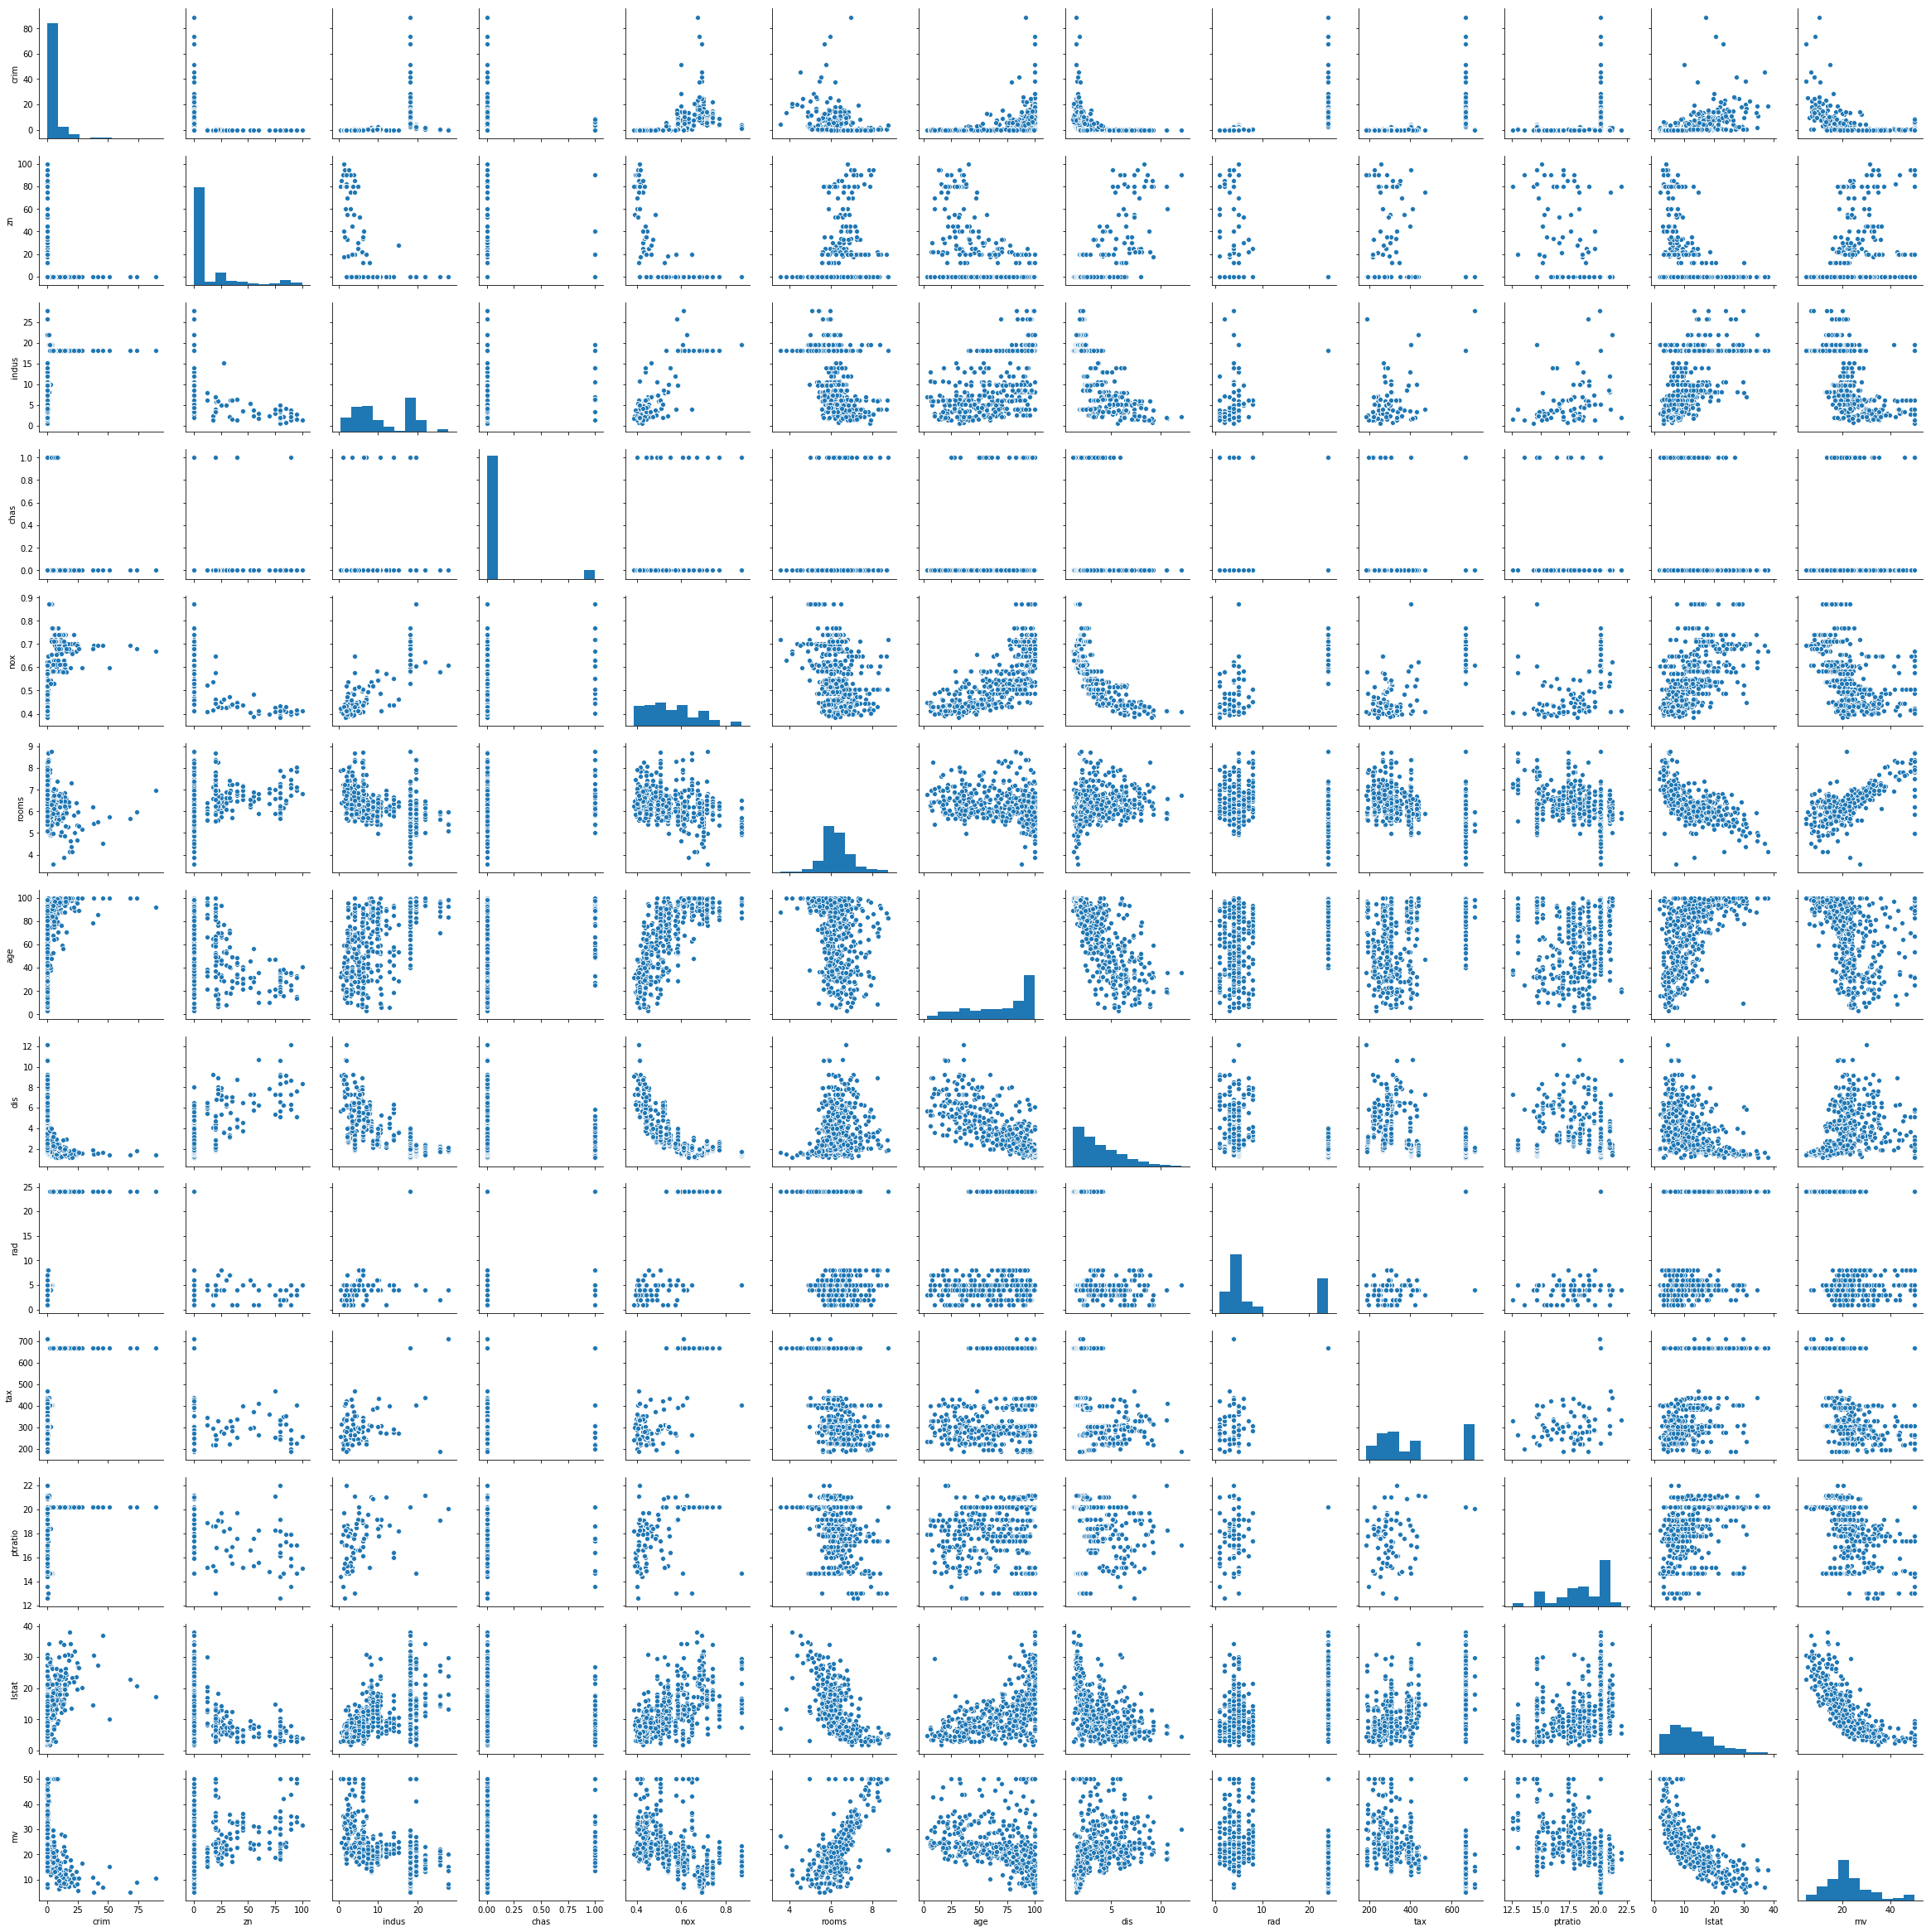

In [5]:
sns.pairplot(mydata, diag_kind='hist')

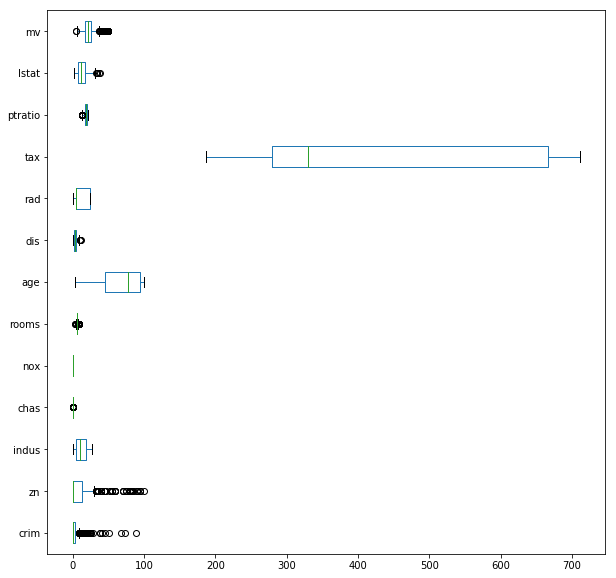

In [6]:
mydata.boxplot(vert=False, figsize=(10,10), grid=False)

In [0]:
mydata2=mydata.apply(lambda x: x+.01)

In [8]:
mydata2.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.01632,18.01,2.32,0.01,0.548,6.585,65.21,4.1000,1.01,296.01,15.31,4.99,24.01
1,0.03731,0.01,7.08,0.01,0.479,6.431,78.91,4.9771,2.01,242.01,17.81,9.15,21.61
2,0.03729,0.01,7.08,0.01,0.479,7.195,61.11,4.9771,2.01,242.01,17.81,4.04,34.71
3,0.04237,0.01,2.19,0.01,0.468,7.008,45.81,6.0722,3.01,222.01,18.71,2.95,33.41
4,0.07905,0.01,2.19,0.01,0.468,7.157,54.21,6.0722,3.01,222.01,18.71,5.34,36.21


In [0]:
mydata3 = mydata2.transform(lambda x: st.boxcox(x)[0])

In [10]:
mydata3.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,-5.752617,1.708418,1.014663,-587728.314092,-0.810467,2.960401,201.842701,1.264160,0.009943,1.807153,33009.396839,1.939868,4.589092
1,-4.286098,-13.373080,3.075151,-587728.314092,-1.064124,2.905657,260.910666,1.416765,0.664175,1.796475,63758.135934,2.876120,4.380581
2,-4.286990,-13.373080,3.075151,-587728.314092,-1.064124,3.170577,184.938977,1.416765,0.664175,1.796475,63758.135934,1.642857,5.357762
3,-4.076712,-13.373080,0.932774,-587728.314092,-1.111280,3.107229,125.396307,1.568513,1.018925,1.791545,79016.524332,1.226204,5.275244
4,-3.107491,-13.373080,0.932774,-587728.314092,-1.111280,3.157778,157.365843,1.568513,1.018925,1.791545,79016.524332,2.038263,5.450026


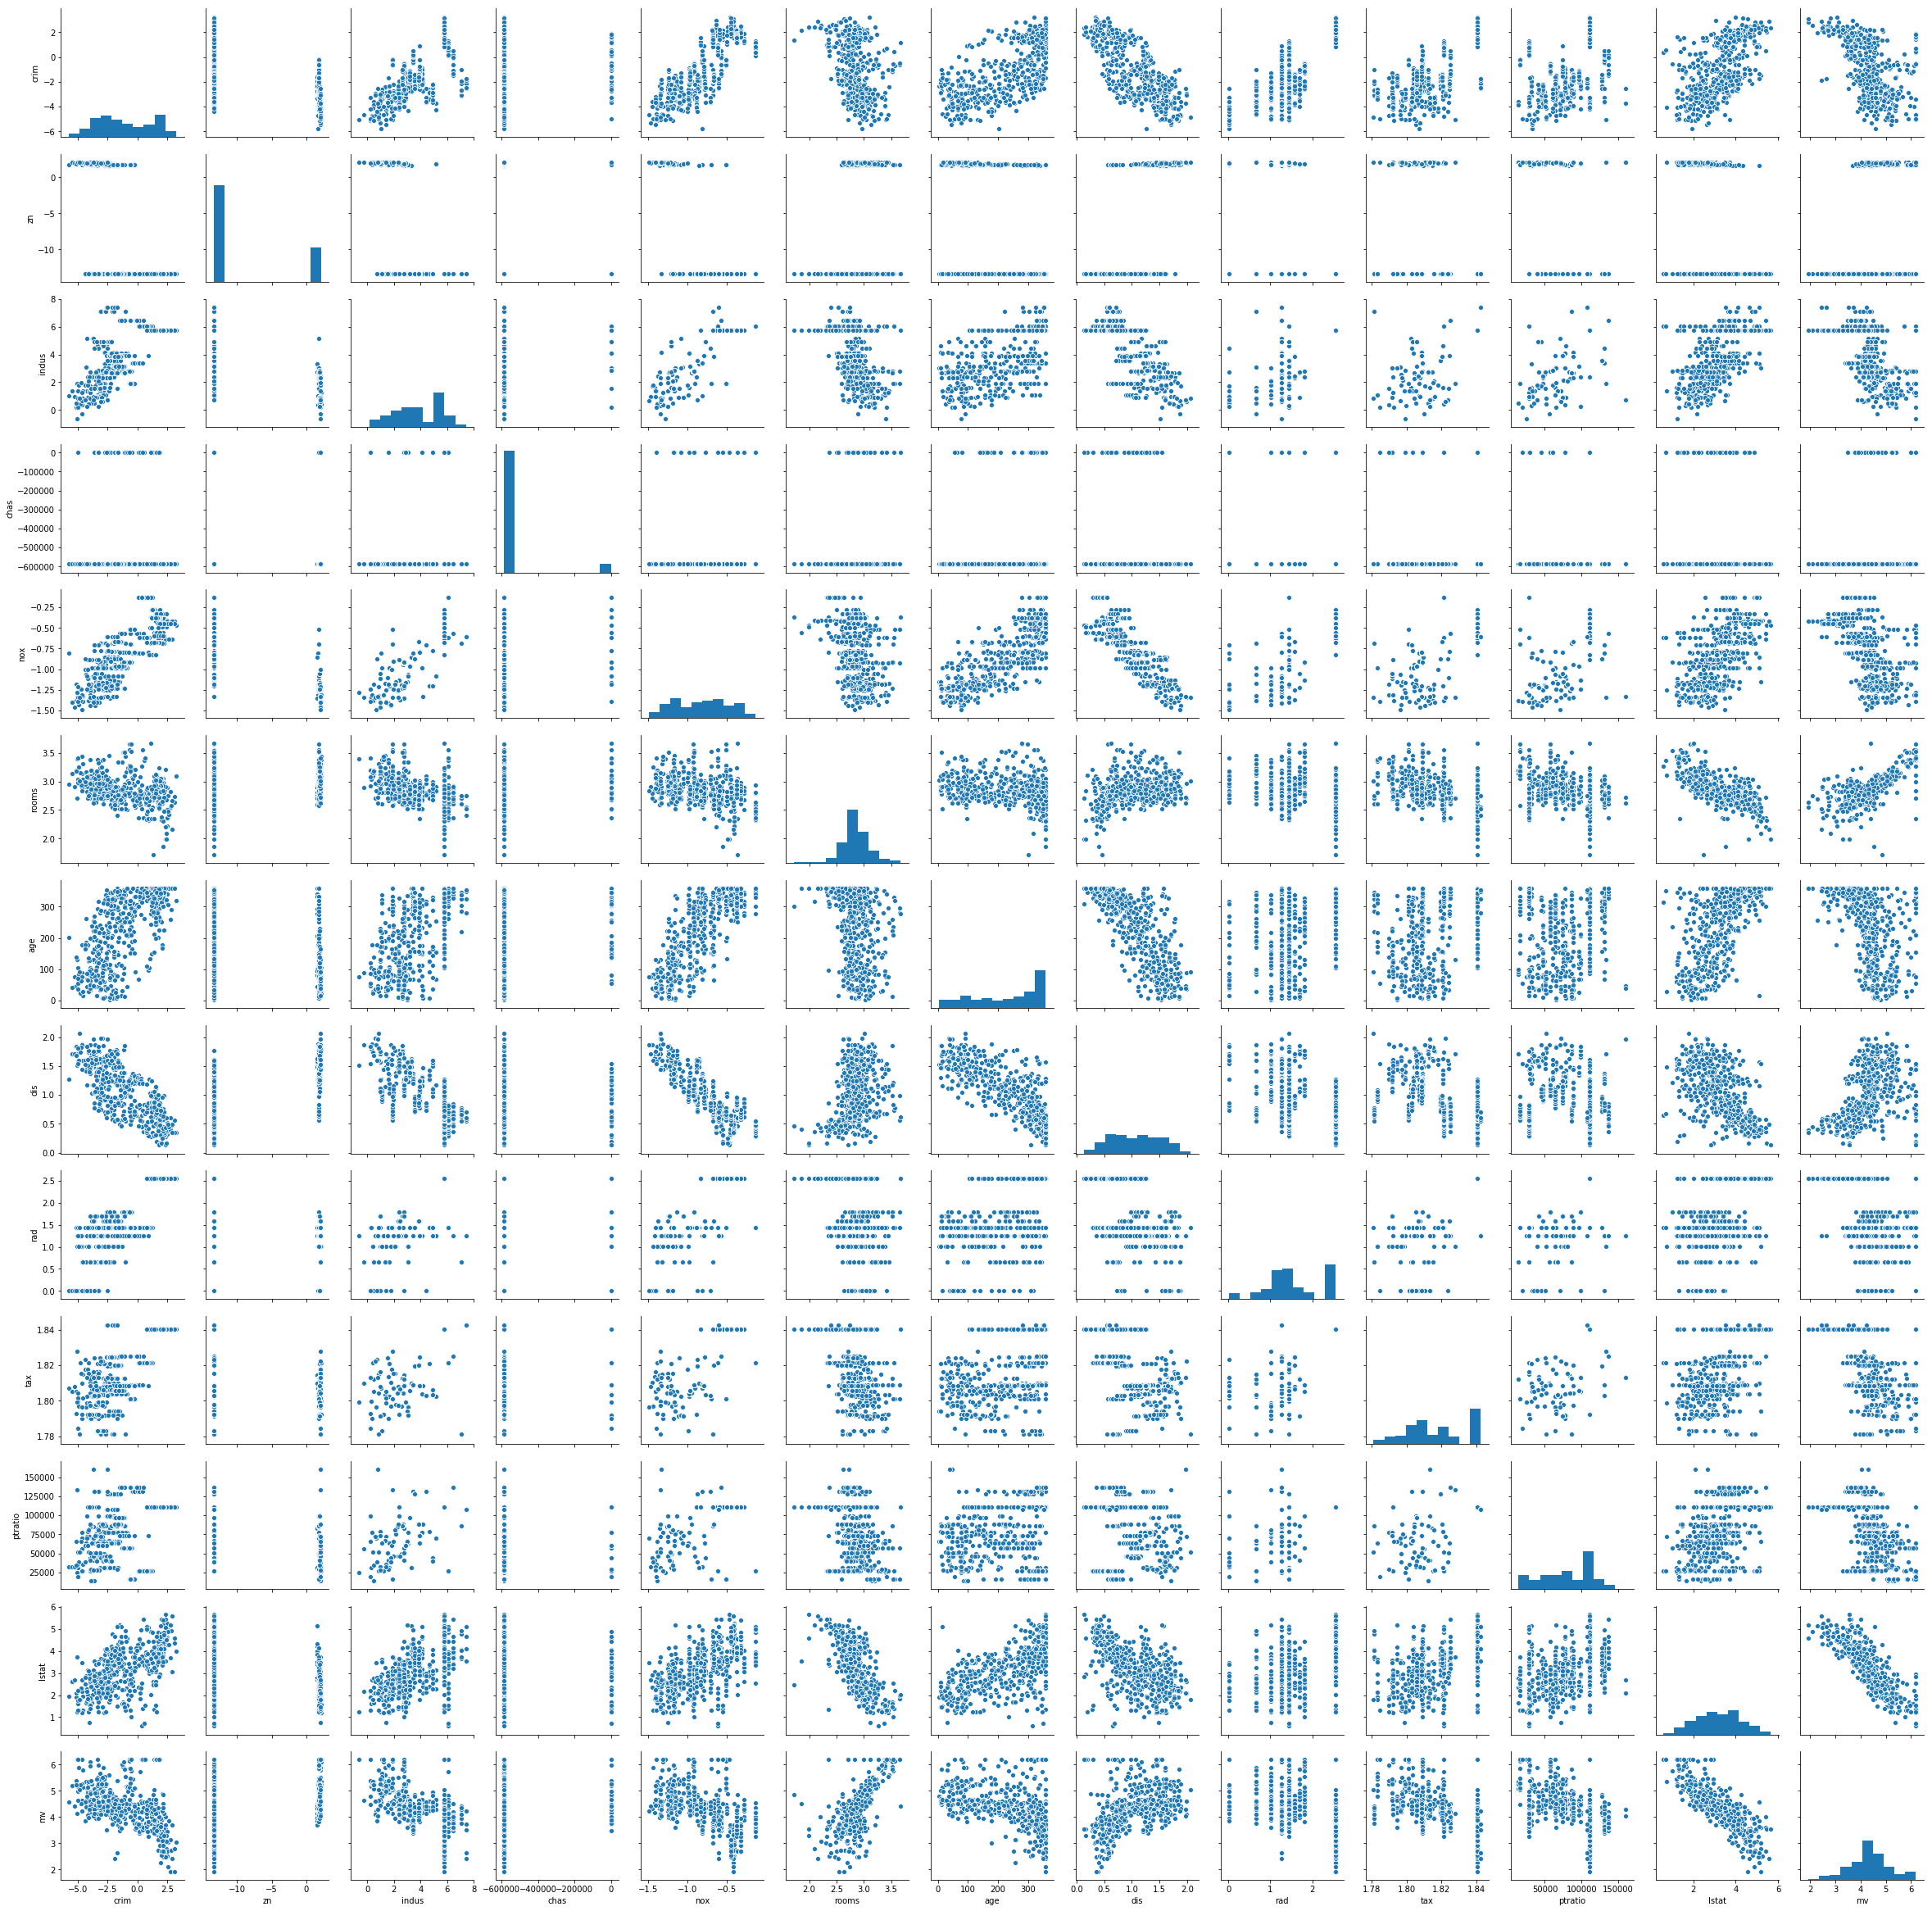

In [11]:
sns.pairplot(mydata3, diag_kind='hist')

In [0]:
mydata4 = mydata3.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1df6429c88>,
      dtype=object)

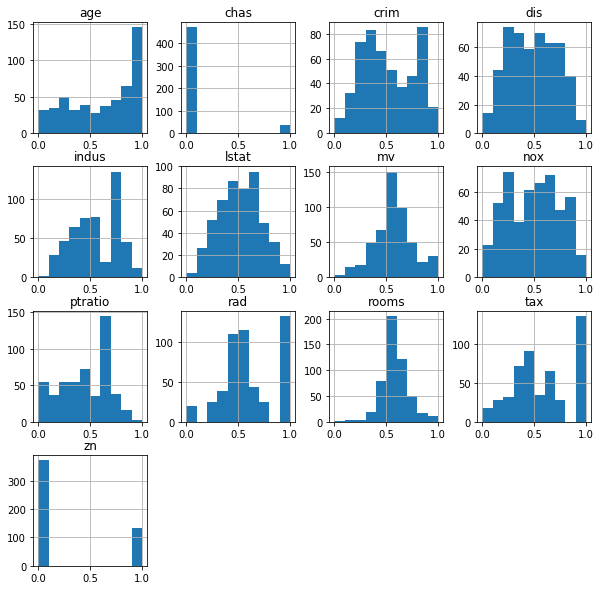

In [13]:
mydata4.hist(figsize=(10,10))

In [14]:
mydata4.describe(include="all")

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794,0.566816
std,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937,0.184926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902,0.469326
50%,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193,0.567460
75%,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866,0.644398
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
cols = mydata4.columns.tolist()
cols = cols[-1:] + cols[:-1]
mydata5=mydata4[cols]
mydata5.describe(include="all")

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.566816,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794
std,0.184926,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469326,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902
50%,0.567460,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193
75%,0.644398,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


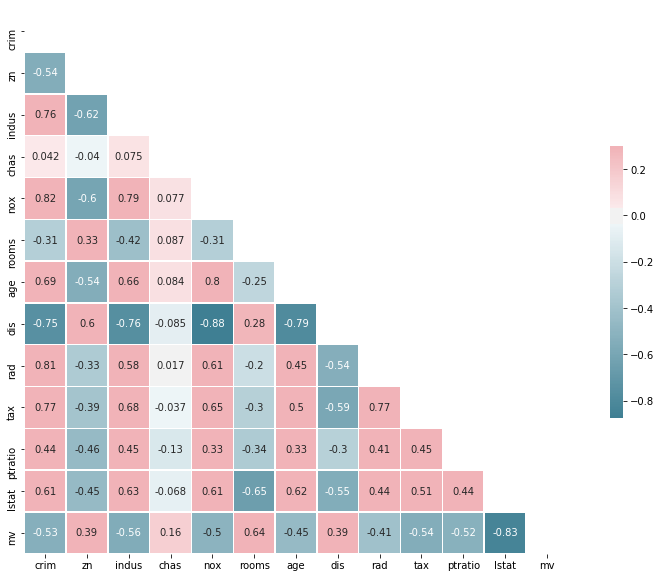

In [16]:
plt.figure(figsize=(15,10))
corr=mydata4.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [0]:
model_data=mydata5.values

In [0]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
#names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression', 
#         'RandomForest_Regression', 'ExtraTrees_Regression']

names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              Ridge(alpha = 75, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              Lasso(alpha = 0.01, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED)]
              #RandomForestRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED),
              #ExtraTreesRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED)]

# Random Search

In [20]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

This completes the examples for Module 3.